## Lab 11
Zuzanna Liberto<br>
11/19/20


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("forestfires.csv")

In [3]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### 1.

/Users/zliberto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


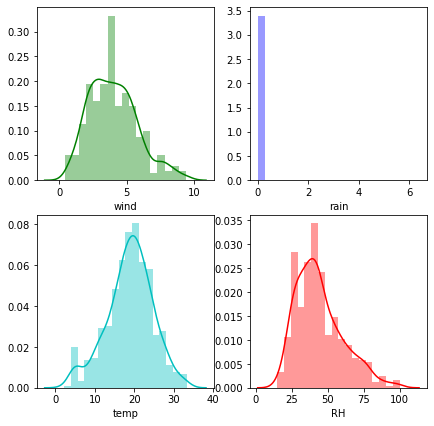

In [4]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False)
sns.distplot(data["wind"] , color="g", ax=axes[0, 0])
sns.distplot(data["rain"] , color="b", ax=axes[0, 1])
sns.distplot(data["temp"] , color="c", ax=axes[1, 0])
sns.distplot(data["RH"] , color="r", ax=axes[1, 1])

### 2.

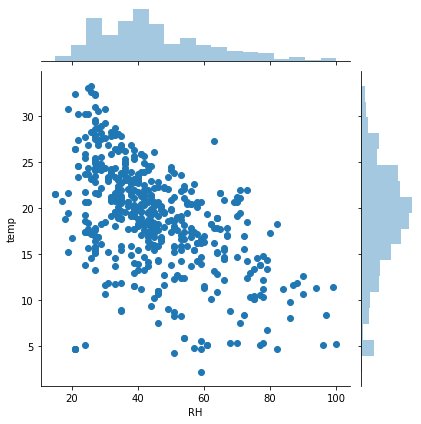

In [5]:
sns.jointplot(x=data["RH"], y=data["temp"])


### 3.

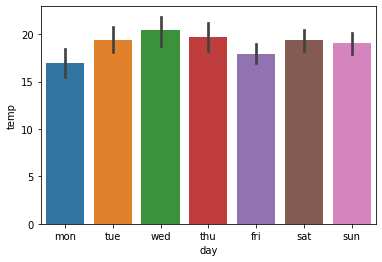

In [6]:
ax = sns.barplot(x="day", y="temp", data=data, order = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"])

### 4.

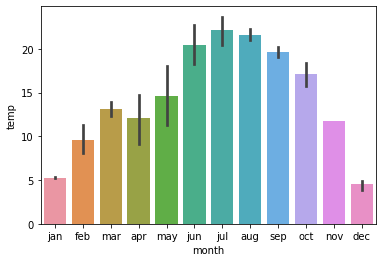

In [7]:
ax = sns.barplot(x="month", y="temp", data=data, order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])

### 5.
done, the order argument to the sns.barplot function needed to be specified

### 6.

In [8]:
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]
data['month'] = pd.Categorical(data['month'], categories=months, ordered=True)

In [9]:
fires = data.groupby("month").size()
fires

month
jan      2
feb     20
mar     54
apr      9
may      2
jun     17
jul     32
aug    184
sep    172
oct     15
nov      1
dec      9
dtype: int64

In [10]:
avg_temp = data.groupby("month")["temp"].mean()
avg_temp

month
jan     5.250000
feb     9.635000
mar    13.083333
apr    12.044444
may    14.650000
jun    20.494118
jul    22.109375
aug    21.631522
sep    19.612209
oct    17.093333
nov    11.800000
dec     4.522222
Name: temp, dtype: float64

In [11]:
df = pd.DataFrame(list(zip(fires, avg_temp)), columns =['Number of fires', 'Average Temperature'])
df

,Number of fires,Average Temperature
0,2,5.250000
1,20,9.635000
2,54,13.083333
3,9,12.044444
4,2,14.650000
5,17,20.494118
6,32,22.109375
7,184,21.631522
8,172,19.612209
9,15,17.093333


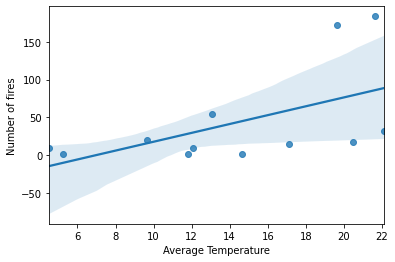

In [12]:
sns.regplot(x=df["Average Temperature"], y=df["Number of fires"])

### The higher the temperature, the more forest fires occurs